Import required modules, libraries and Shakespearean text for project

In [95]:
from __future__ import print_function
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import TreebankWordTokenizer
import urllib.request
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
import gensim
from functools import reduce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd
import os
import string
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

Much_Ado = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-much-3.txt').read()
Much_Ado_lines = Much_Ado.decode('utf8')
Tempest = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-tempest-4.txt').read()
Tempest_lines = Tempest.decode('utf8')
Richard = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-tragedy-58.txt').read()
Richard_lines = Richard.decode('utf8')
Winter = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-winters-19.txt').read()
Winter_lines = Winter.decode('utf8')
Merchant = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-merchant-5.txt').read()
Merchant_lines = Merchant.decode('utf8')
Midsummer = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-midsummer-16.txt').read()
Midsummer_lines = Midsummer.decode('utf8')  
Measure = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-measure-13.txt').read()
Measure_lines = Measure.decode('utf8')
Macbeth = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-macbeth-46.txt').read()
Macbeth_lines = Macbeth.decode('utf8')
Hamlet = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-hamlet-25.txt').read()
Hamlet_lines = Hamlet.decode('utf8')
Cymbeline = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-cymbeline-17.txt').read()
Cymbeline_lines = Cymbeline.decode('utf8')
Jacobian_Plays = Cymbeline_lines+Measure_lines+Winter_lines
Early_Com = Much_Ado_lines+Midsummer_lines+Merchant_lines
Tragedies = Richard_lines+Hamlet_lines+Macbeth_lines

Introduce stopwords, including a corpus of Shakespearean stopwords

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['|','[',']','Messenger','shall','must','would','Would','Don','Pedro','John','Claudio','Benedick',
         'Leonato','Antonio','Balthazar','Conrade','Borachio','Francis','Dogberry','Verges'
         'Sexton','sexton','Hero','Beatrice','Margaret','Ursula','Alonso','Sebastian','Prospero','Antonio',
         'Fernando','Gonzalo','Francisco','Caliban','Trinculo','Stephano','Boatswain','Mariners',
         'Miranda', 'Ariel','Iris','Ceres','Juno','Nymphs', 'Edward','Richard','George','Clarence','Henry','Cardinal',
         'Bouchier','Thomas', 'Rotherham', 'John', 'Morton', 'Hastings','Lord','Earl','Lovel','Oxford','Stanley',
         'Ratcliff','Vaughan','Rivers','Buckingham','Surrey''James','Tyrell','Blount','Ratcliff','Herbert','Lady',
         'Anne','Margaret','Elizabeth','Duchess','York','Robert', 'Brankenbury','Christopher','Urswick','Leontes',
         'Mamillius', 'Camillo', 'Antigonus','Cleomenes','Dion','Polixenes','Florizel','Archidamus','Shepherd','Clown',
         'Autolycus','Mariner','A Gaoler','Hermione','Perdita','Paulina','Emilia','Mopsa','Dorcas',
         'Shylock','Portia','Bassanio','Antonio','Gratiano','Launcelot','Gobbo','Solanio','Salarino','Salerio','Stephano', 
         'Jessica','Duke of Venice','Nerissa','Prince of Morocco', 'Price of Arragon', 'Duke', 'Lorenzo',
         'Tubal', 'Balzarina','Balthazar','Titania','Oberon','Hippolyta','Hermia','Puck','Lysander','Nick Bottom','Helena',
         'Egeus','Demetrius','Peter','Quince','Philostrate','Robin','Starveling','Francis Flute','Tom', 'Snout','Snug','Theseus',
         'Cobweb','Lady Macbeth','Banquo','King Duncan','Macduff','Macbeth','Fleance','Young','Siward','Malcolm','Donalbain',
         'Third Murderer','Lady Macduff','Seyton','Witch #3','Witch #1','Witch #2','Murderer','Murderer','Doctor',
         'Ross','Angus','Old Man','Child #1','Lennox','Captain','Porter','Gentlewoman','Servant','Claudius','Hamlet','Polonius',
         'Horatio','Laertes','Lucianus','Voltimand','Cornelius','Rosencrantz','Guildenstern','Osric','Marcellus','Bernardo',
         'Francisco','Reynaldo','First Player','Player King','Player Queen','First Clown','Second Clown','Fortinbras',
         'First Ambassador','Gertrude','Ophelia','Imogen','Iachimo','Pisanio','Belarius','Philario','Cloten','Caius Lucius','Posthumus Leonatus',
         'Arviragus','Soothsayer','Helen','Cymbeline','Guiderius','Pyramus','Thisby','c','h','v','Duke Od Venice','Brabantio', 'First Senator','Second Senator',
         'Gratiano','Lodovico','Othello','Cassio','Iago','Roderigo','Montano','Clown','Desdemona','Emilia','Sailor','First Officer','Messenger',
         'First Gentleman','Second Gentleman','Third Gentleman','First Musician']
         
stop += open('new_stop.txt','r').readlines()
stop = [i.replace('\n',"") for i in stop]
stop = [x.lower() for x in stop]


Create functions to clean text and separate text into acts

In [ ]:
def Topic_Model(play):
    Vocab = []
    play_lines = []
    Object = play[play.find("ACT"):]
    for line in sent_tokenize(Object):
        line = re.sub('[A-Z]{2,}',' ',line)
        line = re.sub("\[[^\]]*\]","",line)
        line= re.sub('[%s]' % re.escape(string.punctuation), '', line)
        line = line.lower()
        play_lines.append(line.split())
    for i in play_lines:
        Vocab.append(' '.join(list(filter(lambda x: x not in stop, i))))
    return Vocab

def Find_Acts_Model(play):
    play_Acts = {}
    play_Acts2 = {}
    i = 0
    b = 0
    for x in range(1,play.count('ACT')+1):
        i = play.find("ACT",+ b)
        b = play.find("ACT", i + 1)
        play_Acts[x] = play[i:b]
    for i in ['ACT I','ACT II','ACT III','ACT IV','ACT V']:
        play_Acts2[i] = []
    for k,v in play_Acts.items():
        for i,j in play_Acts2.items():
            if i in v.split('\n'):
                play_Acts2[i].append(v)
    return play_Acts2

Create Word2Vec model

In [35]:
def W2V(play,Act):
    return gensim.models.Word2Vec([x.split() for x in Topic_Model(str(' '.join(Find_Acts_Model(play)[Act])))],size=100,min_count=1,workers=2)

Plot Word2Vec model in space using T_SNE

In [37]:
def tsne_plot(model,play,Act):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    def nmf_vec(play,Act):
        tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),max_df=.9, min_df=1)
        tfidf1 = tfidf_vectorizer1.fit_transform(Topic_Model(str(' '.join(Find_Acts_Model(play)[Act]))))
        tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()
        nmf1 = NMF(n_components=5)
        nmf1.fit_transform(tfidf1)
        tl = [(list(i).index(max(i)), max(i)/sum(i)) for i in nmf1.components_.T]
        vector_list = list(zip(tfidf_feature_names1, [e[0] if e[1]>0.97 else 5 for e in tl]))
        color_list = {0:'blue',1:'red',2:'orange',3:'purple',4:'green',5:'white'}
        vector_dict = defaultdict()
        for k,v in vector_list:
            vector_dict[k] = color_list[v]
        return vector_dict

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=300)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
         
    plt.figure(figsize=(8, 8)) 
    for i,j in enumerate(x):
        plt.scatter(x[i],y[i], c = nmf_vec(play,Act)[labels[i]])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)    
    plt.show()           

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


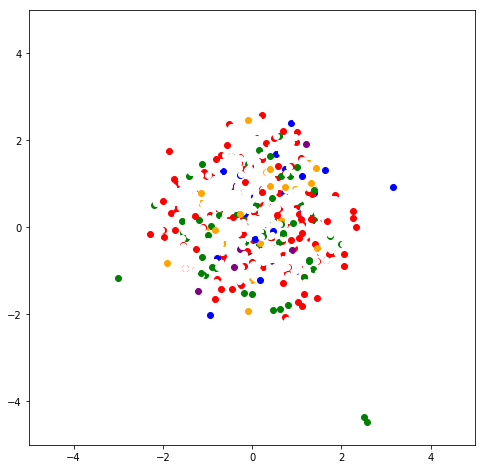

In [23]:
tsne_plot(W2V(Much_Ado_lines,'ACT II'),Much_Ado_lines,'ACT II') 

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


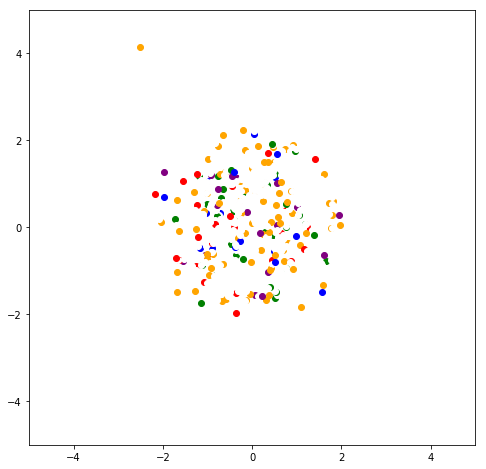

In [111]:
tsne_plot(W2V(Much_Ado_lines,'ACT III'),Much_Ado_lines,'ACT III') 

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


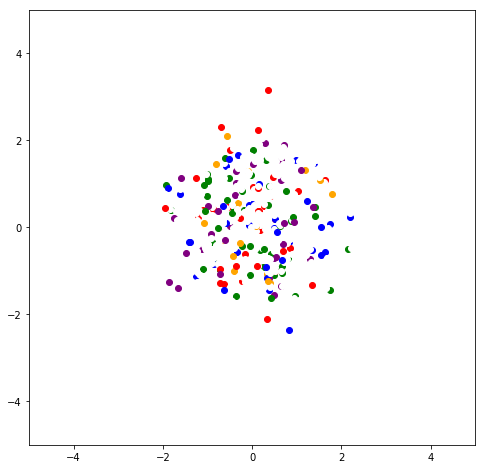

In [112]:
tsne_plot(W2V(Much_Ado_lines,'ACT IV'),Much_Ado_lines,'ACT IV') 

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


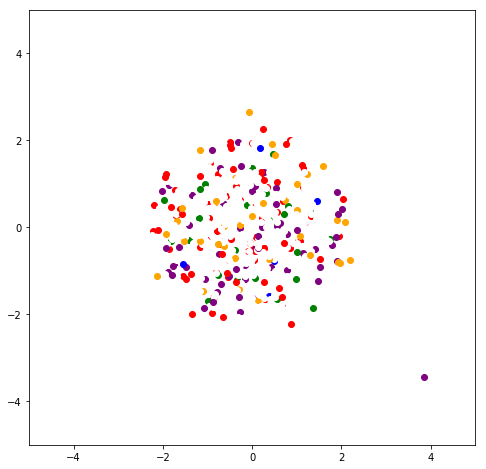

In [113]:
tsne_plot(W2V(Much_Ado_lines,'ACT V'),Much_Ado_lines,'ACT V') 

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


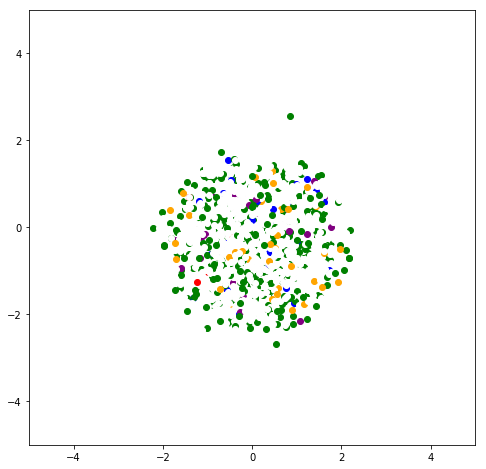

In [116]:
tsne_plot(W2V(Hamlet_lines,'ACT I'),Hamlet_lines,'ACT I')

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


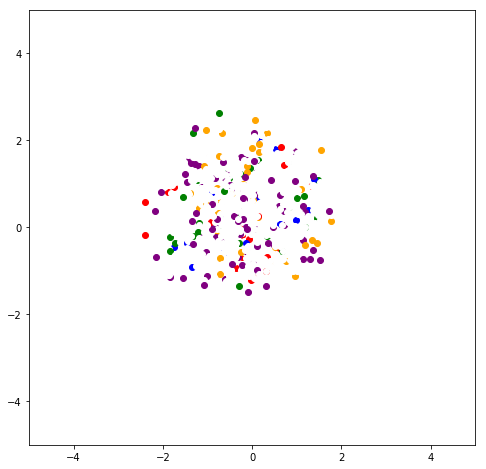

In [25]:
tsne_plot(W2V(Hamlet_lines,'ACT II'),Hamlet_lines,'ACT II')

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


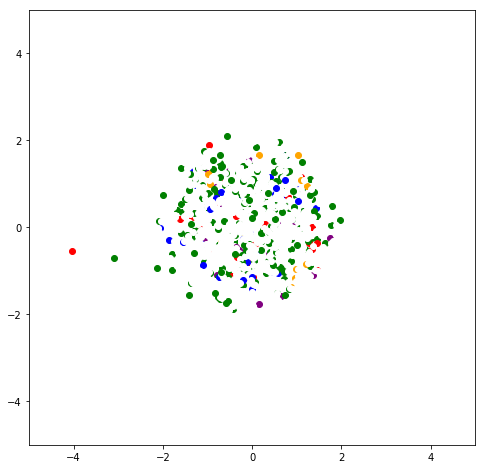

In [114]:
tsne_plot(W2V(Hamlet_lines,'ACT III'),Hamlet_lines,'ACT III')

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


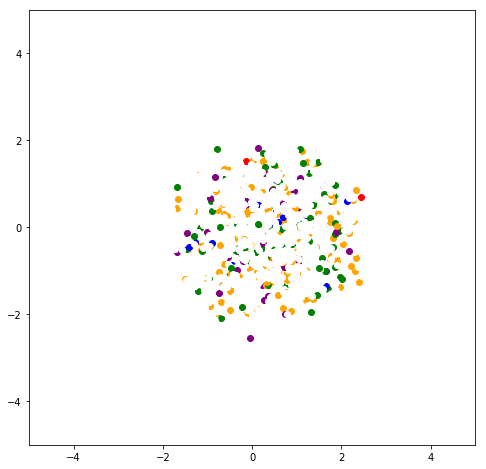

In [115]:
tsne_plot(W2V(Hamlet_lines,'ACT IV'),Hamlet_lines,'ACT IV')

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


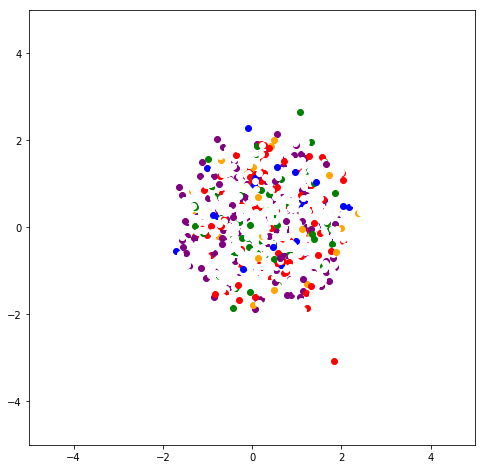

In [55]:
tsne_plot(W2V(Hamlet_lines,'ACT V'),Hamlet_lines,'ACT V')

Create function to only take words which appear less than six times in a corpus

In [108]:
def filtered_model(play,Act):
    sentences = [x.split()  for x in Topic_Model(str(' '.join(Find_Acts_Model(play)[Act])))]
    b_o_w = defaultdict(int)
    for i in sentences:
        for j in i:
            b_o_w[j]+=1 
        
    b_o_w = {k:v for k,v in b_o_w.items() if v >=6}
    for sentence in sentences:
        for word in sentence:
            if word in b_o_w.keys():
                sentence.remove(word)
    return gensim.models.Word2Vec(sentences,size=100,min_count=1,workers=2)

def tsne_plot2(model,play,Act):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
  
    def nmf_vec(play,Act):
        tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),max_df=.9, min_df=1)
        tfidf1 = tfidf_vectorizer1.fit_transform(Topic_Model(str(' '.join(Find_Acts_Model(play)[Act]))))
        tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()
        nmf1 = NMF(n_components=5)
        nmf1.fit_transform(tfidf1)
        tl = [(list(i).index(max(i)), max(i)/sum(i)) for i in nmf1.components_.T]
        vector_list = list(zip(tfidf_feature_names1, [e[0] if e[1]>0.97 else 5 for e in tl]))
        color_list = {0:'blue',1:'red',2:'orange',3:'purple',4:'green',5:'white'}
        vector_dict = defaultdict()
        for k,v in vector_list:
            vector_dict[k] = color_list[v]
        return vector_dict

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=300)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
         
    plt.figure(figsize=(8, 8)) 
    for i,j in enumerate(x):
        plt.scatter(x[i],y[i], c = nmf_vec(play,Act)[labels[i]])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)    
    plt.show()           

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


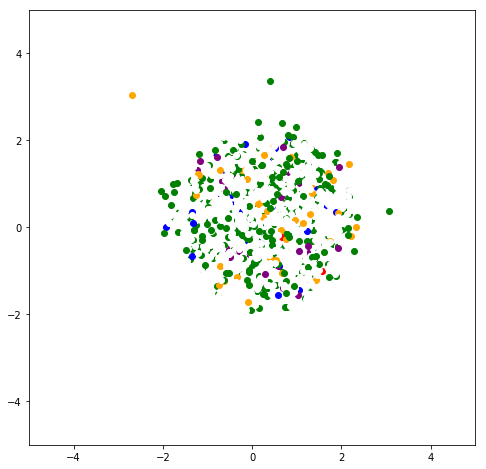

In [110]:
tsne_plot2(filtered_model(Hamlet_lines,'ACT I'),Hamlet_lines,'ACT I')